In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('large_data.csv')
df['TYPE'] = df['TYPE'].astype('category')

In [4]:
input_names = list(df.columns)
input_names.remove('TYPE')

all_inputs = df[input_names].values
all_labels = df['TYPE'].values

In [5]:
from sklearn.model_selection import train_test_split

(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1)

In [6]:
from sklearn.tree import DecisionTreeClassifier

# Create the classifier
decision_tree_classifier = DecisionTreeClassifier()

# Train the classifier on the training set
decision_tree_classifier.fit(training_inputs, training_classes)

# Validate the classifier on the testing set using classification accuracy
decision_tree_classifier.score(testing_inputs, testing_classes)

0.8835702717293503

In [7]:
from sklearn.metrics import classification_report, confusion_matrix

predictions = decision_tree_classifier.predict(testing_inputs)
print(classification_report(testing_classes, predictions))

              precision    recall  f1-score   support

     ALLERGY       0.96      0.97      0.96      4118
        COLD       0.27      0.30      0.28       246
       COVID       0.18      0.20      0.19       523
         FLU       0.93      0.91      0.92      6227

    accuracy                           0.88     11114
   macro avg       0.59      0.59      0.59     11114
weighted avg       0.89      0.88      0.89     11114



In [10]:
improved_clf = DecisionTreeClassifier(criterion='gini', max_depth=11, max_features=7, splitter='random')

# Train the classifier on the training set
improved_clf.fit(training_inputs, training_classes)
new_predictions = improved_clf.predict(testing_inputs)
print(classification_report(testing_classes, new_predictions))

              precision    recall  f1-score   support

     ALLERGY       1.00      0.97      0.98      4118
        COLD       0.49      0.72      0.58       246
       COVID       0.40      0.19      0.26       523
         FLU       0.92      0.96      0.94      6227

    accuracy                           0.92     11114
   macro avg       0.70      0.71      0.69     11114
weighted avg       0.91      0.92      0.91     11114



(array([  2.,  10.,  44., 133., 281., 290., 172.,  56.,  11.,   1.]),
 array([0.87718193, 0.87895447, 0.88072701, 0.88249955, 0.88427209,
        0.88604463, 0.88781717, 0.88958971, 0.89136225, 0.89313478,
        0.89490732]),
 <a list of 10 Patch objects>)

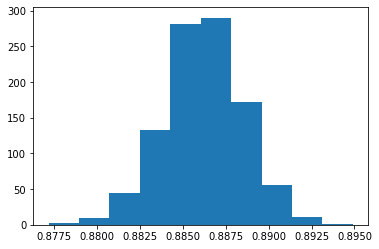

In [16]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sb

model_accuracies = []

for repetition in range(1000):
    (training_inputs,
     testing_inputs,
     training_classes,
     testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.25)
    
    decision_tree_classifier = DecisionTreeClassifier()
    decision_tree_classifier.fit(training_inputs, training_classes)
    classifier_accuracy = decision_tree_classifier.score(testing_inputs, testing_classes)
    model_accuracies.append(classifier_accuracy)
    
plt.hist(model_accuracies)

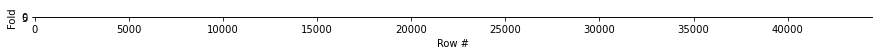

In [17]:
import numpy as np
from sklearn.model_selection import StratifiedKFold

def plot_cv(cv, features, labels):
    masks = []
    for train, test in cv.split(features, labels):
        mask = np.zeros(len(labels), dtype=bool)
        mask[test] = 1
        masks.append(mask)
    
    plt.figure(figsize=(15, 15))
    plt.imshow(masks, interpolation='none', cmap='gray_r')
    plt.ylabel('Fold')
    plt.xlabel('Row #')

plot_cv(StratifiedKFold(n_splits=10), all_inputs, all_labels)

Text(0.5, 1.0, 'Average score: 0.8783208779064561')

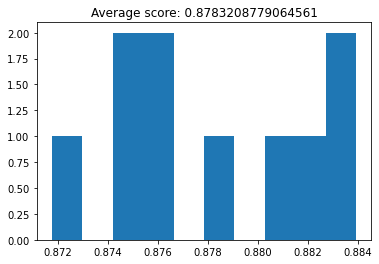

In [18]:
from sklearn.model_selection import cross_val_score

decision_tree_classifier = DecisionTreeClassifier()

# cross_val_score returns a list of the scores, which we can visualize
# to get a reasonable estimate of our classifier's performance
cv_scores = cross_val_score(decision_tree_classifier, all_inputs, all_labels, cv=10)
plt.hist(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))

Text(0.5, 1.0, 'Average score: 0.7416146767079216')

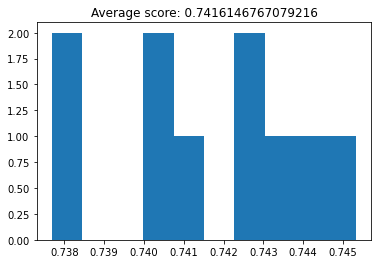

In [19]:
decision_tree_classifier = DecisionTreeClassifier(max_depth=1)

cv_scores = cross_val_score(decision_tree_classifier, all_inputs, all_labels, cv=10)
plt.hist(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))

In [28]:
from sklearn.model_selection import GridSearchCV

decision_tree_classifier = DecisionTreeClassifier()

parameter_grid = {'max_depth': [8, 9, 10, 11, 12, 13],
                  'max_features': [5, 6, 7, 8, 9, 10]}

cross_validation = StratifiedKFold(n_splits=10)

grid_search = GridSearchCV(decision_tree_classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(all_inputs, all_labels)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.9234699609917183
Best parameters: {'max_depth': 11, 'max_features': 9}


Text(33.0, 0.5, 'max_depth')

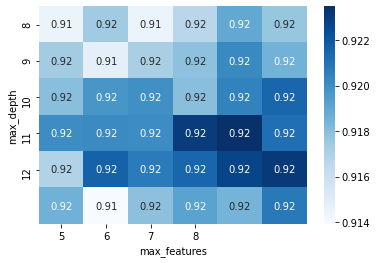

In [29]:
grid_visualization = grid_search.cv_results_['mean_test_score']
grid_visualization.shape = (6, 6)
sb.heatmap(grid_visualization, cmap='Blues', annot=True)
plt.xticks(np.arange(4) + 0.5, grid_search.param_grid['max_features'])
plt.yticks(np.arange(5) + 0.5, grid_search.param_grid['max_depth'])
plt.xlabel('max_features')
plt.ylabel('max_depth')

In [30]:
decision_tree_classifier = DecisionTreeClassifier()

parameter_grid = {'criterion': ['gini', 'entropy'],
                  'splitter': ['best', 'random'],
                  'max_depth': [8, 9, 10, 11, 12, 13],
                  'max_features': [5, 6, 7, 8, 9, 10]}

cross_validation = StratifiedKFold(n_splits=10)

grid_search = GridSearchCV(decision_tree_classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(all_inputs, all_labels)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))
print('Best estimator: {}'.format(grid_search.best_estimator_))

Best score: 0.9250669982041719
Best parameters: {'criterion': 'gini', 'max_depth': 11, 'max_features': 7, 'splitter': 'random'}
